In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_HVN_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,30274,31432,30274,31278,1231293
1,2019-03-04,31046,33209,31046,33131,2159830
2,2019-03-05,33209,36298,32668,32900,1352465
3,2019-03-06,32050,33054,32050,32745,815962
4,2019-03-07,32591,33054,32359,32436,713115
...,...,...,...,...,...,...
1302,2024-05-27,24200,25350,24000,25150,6719200
1303,2024-05-28,25300,26900,24500,26900,9317700
1304,2024-05-29,26900,28450,26900,28300,6449500
1305,2024-05-30,28300,28500,26800,27700,6116600


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.9 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64,input_shape=(time_step, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0198 - val_loss: 0.0042
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0027 - val_loss: 0.0045
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0010 - val_loss: 0.0035
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.2991e-04 - val_loss: 0.0024
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.4218e-04 - val_loss: 0.0029
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.6603e-04 - val_loss: 0.0030
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.7241e-04 - val_loss: 0.0025
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.7154e-04 - val_loss: 0.0010
Epoch 67/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.5120e-04 - val_loss: 9.4078e-04
Epoch 68/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.8188e-04 - val_loss: 0.0012
Epoch 69/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4035e-04 - val_loss: 0.0011
Epoch 70/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.2138e-04 - val_loss: 0.0010
Epoch 71/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.5008e-04 - val_loss: 0.0010
Epoch 72/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.6541e-04 - val_loss: 0.0011
Epoch 73/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6377e-04 - val_loss: 9.7267e-04
Epoch 74/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0655e-04 - val_loss: 0.0013
Epoch 75/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5706e-04 - val_loss: 0.0011
Epoch 76/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.3992e-04 - val_loss: 0.0012
Epoc

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 1337.8024929025164
MAPE: 5.169750699439376 %
MSLE: 0.003870735242109318


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.13923421 0.1717477  0.16983514 0.15835979 0.15070956 0.15070956
 0.148797   0.15453467 0.148797   0.14497189 0.148797   0.148797
 0.14497189 0.15070956 0.15070956 0.14688444 0.14497189 0.14497189
 0.15070956 0.14688444 0.15070956 0.148797   0.14688444 0.14114677
 0.14114677 0.15262212 0.148797   0.15070956 0.16218491 0.16218491
 0.15835979 0.15644723 0.15453467 0.15070956 0.16027235 0.15644723
 0.15453467 0.15453467 0.15835979 0.19087327 0.19087327 0.17557281
 0.1717477  0.18322304 0.1851356  0.19087327 0.19469839 0.18704816
 0.18131048 0.17557281 0.18131048 0.1851356  0.18322304 0.18322304
 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816 0.2214742
 0.23103699 0.21382397 0.24442489 0.28267605 0.29032628 0.28458861
 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163 0.28076349
 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256 0.33049
 0.33240256 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161
 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276 

8 day output [[0.66776335]]
9 day input [0.14497189 0.148797   0.148797   0.14497189 0.15070956 0.15070956
 0.14688444 0.14497189 0.14497189 0.15070956 0.14688444 0.15070956
 0.148797   0.14688444 0.14114677 0.14114677 0.15262212 0.148797
 0.15070956 0.16218491 0.16218491 0.15835979 0.15644723 0.15453467
 0.15070956 0.16027235 0.15644723 0.15453467 0.15453467 0.15835979
 0.19087327 0.19087327 0.17557281 0.1717477  0.18322304 0.1851356
 0.19087327 0.19469839 0.18704816 0.18131048 0.17557281 0.18131048
 0.1851356  0.18322304 0.18322304 0.18322304 0.18322304 0.18131048
 0.1851356  0.18704816 0.2214742  0.23103699 0.21382397 0.24442489
 0.28267605 0.29032628 0.28458861 0.30562675 0.30562675 0.34770302
 0.30945186 0.30180163 0.28076349 0.2712007  0.30371419 0.31327698
 0.32283977 0.33240256 0.33049    0.33240256 0.37830394 0.42611789
 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137 0.50453276
 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044 0.53513369
 0.57720996 0.59633554 0.

16 day output [[0.6160708]]
17 day input [0.14497189 0.15070956 0.14688444 0.15070956 0.148797   0.14688444
 0.14114677 0.14114677 0.15262212 0.148797   0.15070956 0.16218491
 0.16218491 0.15835979 0.15644723 0.15453467 0.15070956 0.16027235
 0.15644723 0.15453467 0.15453467 0.15835979 0.19087327 0.19087327
 0.17557281 0.1717477  0.18322304 0.1851356  0.19087327 0.19469839
 0.18704816 0.18131048 0.17557281 0.18131048 0.1851356  0.18322304
 0.18322304 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816
 0.2214742  0.23103699 0.21382397 0.24442489 0.28267605 0.29032628
 0.28458861 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163
 0.28076349 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256
 0.33049    0.33240256 0.37830394 0.42611789 0.4528937  0.42420533
 0.46628161 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276
 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554
 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397  0.72470838
 0.7169804  0.7069755

26 day output [[0.5663667]]
27 day input [0.15070956 0.16218491 0.16218491 0.15835979 0.15644723 0.15453467
 0.15070956 0.16027235 0.15644723 0.15453467 0.15453467 0.15835979
 0.19087327 0.19087327 0.17557281 0.1717477  0.18322304 0.1851356
 0.19087327 0.19469839 0.18704816 0.18131048 0.17557281 0.18131048
 0.1851356  0.18322304 0.18322304 0.18322304 0.18322304 0.18131048
 0.1851356  0.18704816 0.2214742  0.23103699 0.21382397 0.24442489
 0.28267605 0.29032628 0.28458861 0.30562675 0.30562675 0.34770302
 0.30945186 0.30180163 0.28076349 0.2712007  0.30371419 0.31327698
 0.32283977 0.33240256 0.33049    0.33240256 0.37830394 0.42611789
 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137 0.50453276
 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044 0.53513369
 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528 0.73021459
 0.7340397  0.72470838 0.7169804  0.70697552 0.69616544 0.69452006
 0.69633621 0.688245   0.67304444 0.66776335 0.66343659 0.65733391
 0.64660805 0.63515848

35 day output [[0.47702473]]
36 day input [0.15453467 0.15453467 0.15835979 0.19087327 0.19087327 0.17557281
 0.1717477  0.18322304 0.1851356  0.19087327 0.19469839 0.18704816
 0.18131048 0.17557281 0.18131048 0.1851356  0.18322304 0.18322304
 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816 0.2214742
 0.23103699 0.21382397 0.24442489 0.28267605 0.29032628 0.28458861
 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163 0.28076349
 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256 0.33049
 0.33240256 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161
 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276 0.49305741
 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554 0.63267414
 0.69961366 0.75316528 0.73021459 0.7340397  0.72470838 0.7169804
 0.70697552 0.69616544 0.69452006 0.69633621 0.688245   0.67304444
 0.66776335 0.66343659 0.65733391 0.64660805 0.63515848 0.62894768
 0.62385803 0.61940879 0.61607081 0.61481571 0.60431892 0.59420979
 0.58730894 0.5829218  0.

43 day output [[0.44589207]]
44 day input [0.1851356  0.19087327 0.19469839 0.18704816 0.18131048 0.17557281
 0.18131048 0.1851356  0.18322304 0.18322304 0.18322304 0.18322304
 0.18131048 0.1851356  0.18704816 0.2214742  0.23103699 0.21382397
 0.24442489 0.28267605 0.29032628 0.28458861 0.30562675 0.30562675
 0.34770302 0.30945186 0.30180163 0.28076349 0.2712007  0.30371419
 0.31327698 0.32283977 0.33240256 0.33049    0.33240256 0.37830394
 0.42611789 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137
 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044
 0.53513369 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528
 0.73021459 0.7340397  0.72470838 0.7169804  0.70697552 0.69616544
 0.69452006 0.69633621 0.688245   0.67304444 0.66776335 0.66343659
 0.65733391 0.64660805 0.63515848 0.62894768 0.62385803 0.61940879
 0.61607081 0.61481571 0.60431892 0.59420979 0.58730894 0.5829218
 0.58409554 0.58234191 0.57823992 0.57027322 0.56636667 0.55874544
 0.54546458 0.5351228

52 day output [[0.403261]]
53 day input [0.18322304 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816
 0.2214742  0.23103699 0.21382397 0.24442489 0.28267605 0.29032628
 0.28458861 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163
 0.28076349 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256
 0.33049    0.33240256 0.37830394 0.42611789 0.4528937  0.42420533
 0.46628161 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276
 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554
 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397  0.72470838
 0.7169804  0.70697552 0.69616544 0.69452006 0.69633621 0.688245
 0.67304444 0.66776335 0.66343659 0.65733391 0.64660805 0.63515848
 0.62894768 0.62385803 0.61940879 0.61607081 0.61481571 0.60431892
 0.59420979 0.58730894 0.5829218  0.58409554 0.58234191 0.57823992
 0.57027322 0.56636667 0.55874544 0.54546458 0.53512287 0.52545321
 0.51760268 0.50719947 0.49821174 0.48475945 0.47702473 0.47155041
 0.46571454 0.46503878 0

60 day output [[0.38533726]]
61 day input [0.21382397 0.24442489 0.28267605 0.29032628 0.28458861 0.30562675
 0.30562675 0.34770302 0.30945186 0.30180163 0.28076349 0.2712007
 0.30371419 0.31327698 0.32283977 0.33240256 0.33049    0.33240256
 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161 0.44715603
 0.45863137 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299
 0.51027044 0.53513369 0.57720996 0.59633554 0.63267414 0.69961366
 0.75316528 0.73021459 0.7340397  0.72470838 0.7169804  0.70697552
 0.69616544 0.69452006 0.69633621 0.688245   0.67304444 0.66776335
 0.66343659 0.65733391 0.64660805 0.63515848 0.62894768 0.62385803
 0.61940879 0.61607081 0.61481571 0.60431892 0.59420979 0.58730894
 0.5829218  0.58409554 0.58234191 0.57823992 0.57027322 0.56636667
 0.55874544 0.54546458 0.53512287 0.52545321 0.51760268 0.50719947
 0.49821174 0.48475945 0.47702473 0.47155041 0.46571454 0.46503878
 0.4627516  0.45903492 0.45380333 0.45157215 0.44589207 0.43757769
 0.4318203  0.4264147

68 day output [[0.35986787]]
69 day input [0.30945186 0.30180163 0.28076349 0.2712007  0.30371419 0.31327698
 0.32283977 0.33240256 0.33049    0.33240256 0.37830394 0.42611789
 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137 0.50453276
 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044 0.53513369
 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528 0.73021459
 0.7340397  0.72470838 0.7169804  0.70697552 0.69616544 0.69452006
 0.69633621 0.688245   0.67304444 0.66776335 0.66343659 0.65733391
 0.64660805 0.63515848 0.62894768 0.62385803 0.61940879 0.61607081
 0.61481571 0.60431892 0.59420979 0.58730894 0.5829218  0.58409554
 0.58234191 0.57823992 0.57027322 0.56636667 0.55874544 0.54546458
 0.53512287 0.52545321 0.51760268 0.50719947 0.49821174 0.48475945
 0.47702473 0.47155041 0.46571454 0.46503878 0.4627516  0.45903492
 0.45380333 0.45157215 0.44589207 0.43757769 0.4318203  0.4264147
 0.42133376 0.41750807 0.41472027 0.41032705 0.40675345 0.40326101
 0.39936733 0.3967925

77 day output [[0.33910018]]
78 day input [0.33240256 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161
 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276 0.49305741
 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554 0.63267414
 0.69961366 0.75316528 0.73021459 0.7340397  0.72470838 0.7169804
 0.70697552 0.69616544 0.69452006 0.69633621 0.688245   0.67304444
 0.66776335 0.66343659 0.65733391 0.64660805 0.63515848 0.62894768
 0.62385803 0.61940879 0.61607081 0.61481571 0.60431892 0.59420979
 0.58730894 0.5829218  0.58409554 0.58234191 0.57823992 0.57027322
 0.56636667 0.55874544 0.54546458 0.53512287 0.52545321 0.51760268
 0.50719947 0.49821174 0.48475945 0.47702473 0.47155041 0.46571454
 0.46503878 0.4627516  0.45903492 0.45380333 0.45157215 0.44589207
 0.43757769 0.4318203  0.4264147  0.42133376 0.41750807 0.41472027
 0.41032705 0.40675345 0.40326101 0.39936733 0.3967925  0.39568403
 0.39368159 0.38971388 0.3883732  0.38544583 0.38533726 0.38319626
 0.37931365 0.3735145

85 day output [[0.33264002]]
86 day input [0.50453276 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044
 0.53513369 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528
 0.73021459 0.7340397  0.72470838 0.7169804  0.70697552 0.69616544
 0.69452006 0.69633621 0.688245   0.67304444 0.66776335 0.66343659
 0.65733391 0.64660805 0.63515848 0.62894768 0.62385803 0.61940879
 0.61607081 0.61481571 0.60431892 0.59420979 0.58730894 0.5829218
 0.58409554 0.58234191 0.57823992 0.57027322 0.56636667 0.55874544
 0.54546458 0.53512287 0.52545321 0.51760268 0.50719947 0.49821174
 0.48475945 0.47702473 0.47155041 0.46571454 0.46503878 0.4627516
 0.45903492 0.45380333 0.45157215 0.44589207 0.43757769 0.4318203
 0.4264147  0.42133376 0.41750807 0.41472027 0.41032705 0.40675345
 0.40326101 0.39936733 0.3967925  0.39568403 0.39368159 0.38971388
 0.3883732  0.38544583 0.38533726 0.38319626 0.37931365 0.3735145
 0.36838803 0.36627743 0.36443388 0.36368808 0.35986787 0.35592231
 0.35229635 0.35049891 0

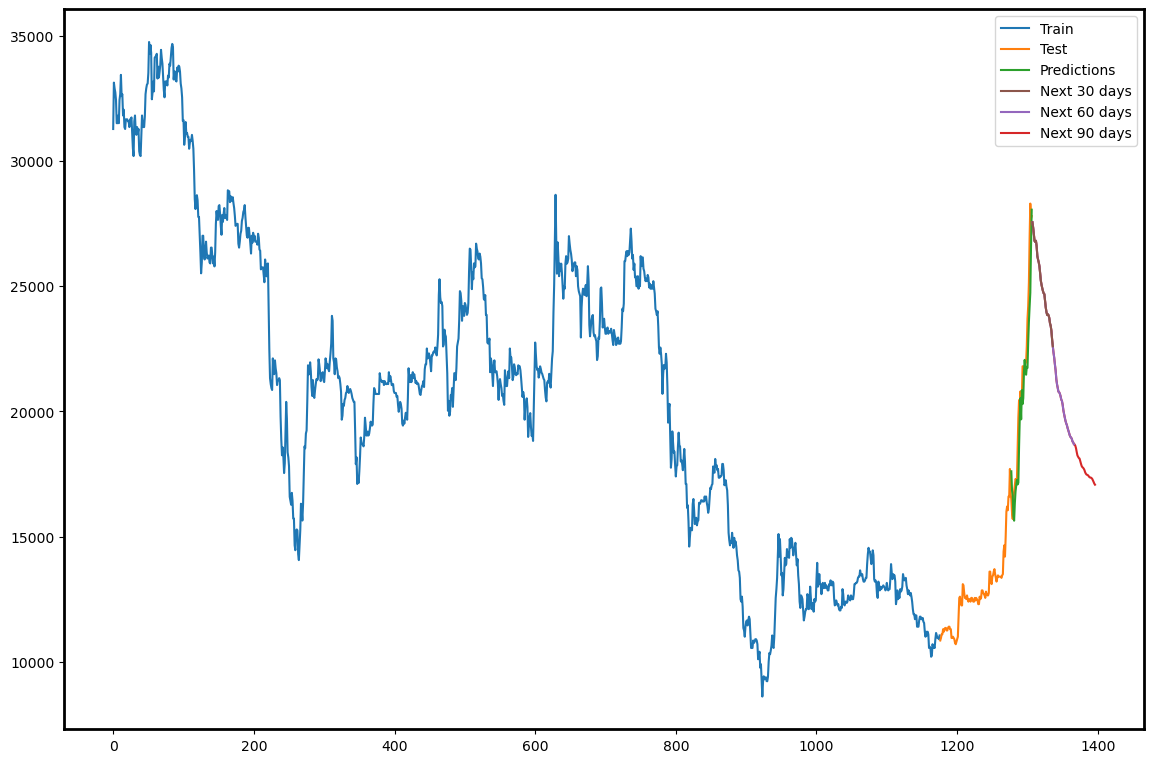

In [12]:
#12. Draw the plot
plt.figure(figsize=(12, 8))
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_HVN_91.png")
plt.show()